<a href="https://colab.research.google.com/github/Rubnserrano/TF-Certification/blob/main/05_curso_tf_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**nota: antes de ejecutarlo todo, meter capas de data augmentation!!!!!!!!!!!!**
# IMPORTANTE!

1.)Write a function to visualize an image from any dataset (train or test file) and any class (e.g. "steak", "pizza"... etc), visualize it and make a prediction on it using a trained model.

2.)Use feature-extraction to train a transfer learning model on 10% of the Food Vision data for 10 epochs using tf.keras.applications.EfficientNetB0 as the base model. Use the ModelCheckpoint callback to save the weights to file.

3.)Fine-tune the last 20 layers of the base model you trained in 2 for another 10 epochs. How did it go?

4-)Fine-tune the last 30 layers of the base model you trained in 2 for another 10 epochs. How did it go?

In [1]:
import tensorflow as tf
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip 


--2022-11-06 23:02:43--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.10.128, 142.251.12.128, 74.125.68.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.10.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.1’

10_food_classes_10_ 100%[===================>] 160.74M  24.0MB/s    in 7.8s    

2022-11-06 23:02:52 (20.7 MB/s) - ‘10_food_classes_10_percent.zip.1’ saved [168546183/168546183]



In [2]:
import zipfile
zip_ref = zipfile.ZipFile('10_food_classes_10_percent.zip','r')
zip_ref.extractall()
zip_ref.close()

In [3]:
data_dir = '/content/10_food_classes_10_percent/'
train_dir = data_dir + 'train'
test_dir = data_dir + 'test'

In [4]:
import os
for dirpath, dirnames, filenames in os.walk('10_food_classes_10_percent'):
    print(f'There are {len(dirnames)} directories and {len(filenames)} images')

There are 2 directories and 0 images
There are 10 directories and 0 images
There are 0 directories and 250 images
There are 0 directories and 250 images
There are 0 directories and 250 images
There are 0 directories and 250 images
There are 0 directories and 250 images
There are 0 directories and 250 images
There are 0 directories and 250 images
There are 0 directories and 250 images
There are 0 directories and 250 images
There are 0 directories and 250 images
There are 10 directories and 0 images
There are 0 directories and 75 images
There are 0 directories and 75 images
There are 0 directories and 75 images
There are 0 directories and 75 images
There are 0 directories and 75 images
There are 0 directories and 75 images
There are 0 directories and 75 images
There are 0 directories and 75 images
There are 0 directories and 75 images
There are 0 directories and 75 images


In [5]:
IMG_SIZE = (224,224)
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory = train_dir,
                                                                            image_size = IMG_SIZE,
                                                                            label_mode = 'categorical',
                                                                            batch_size = 32)
test_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory = test_dir,
                                                                           image_size = IMG_SIZE,
                                                                           label_mode = 'categorical')

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [6]:
import matplotlib.pyplot as plt

# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, 3, activation = 'relu', input_shape = (224,224,3)),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(784, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])
historia = model.fit(train_data_10_percent,
                     epochs = 10,
                     steps_per_epoch = len(train_data_10_percent) ,
                     validation_data = test_data_10_percent,
                     validation_steps= len(test_data_10_percent))

Epoch 1/10
24/24 [==============================] - 10s 283ms/step - loss: 380.6634 - accuracy: 0.1040 - val_loss: 13.5991 - val_accuracy: 0.1164
Epoch 2/10
24/24 [==============================] - 6s 255ms/step - loss: 4.1980 - accuracy: 0.2613 - val_loss: 2.4459 - val_accuracy: 0.1248
Epoch 3/10
24/24 [==============================] - 6s 255ms/step - loss: 1.4084 - accuracy: 0.6253 - val_loss: 2.4431 - val_accuracy: 0.1428
Epoch 4/10
24/24 [==============================] - 6s 255ms/step - loss: 0.7168 - accuracy: 0.9147 - val_loss: 2.6912 - val_accuracy: 0.1520
Epoch 5/10
24/24 [==============================] - 6s 258ms/step - loss: 0.2446 - accuracy: 0.9773 - val_loss: 3.0744 - val_accuracy: 0.1540
Epoch 6/10
24/24 [==============================] - 6s 258ms/step - loss: 0.0699 - accuracy: 0.9933 - val_loss: 3.4448 - val_accuracy: 0.1536
Epoch 7/10
24/24 [==============================] - 6s 258ms/step - loss: 0.0216 - accuracy: 0.9973 - val_loss: 3.6569 - val_accuracy: 0.1576
Ep

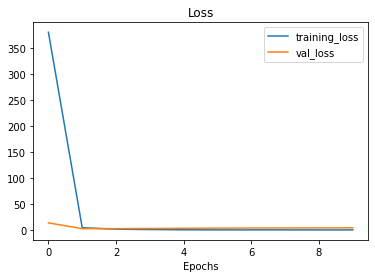

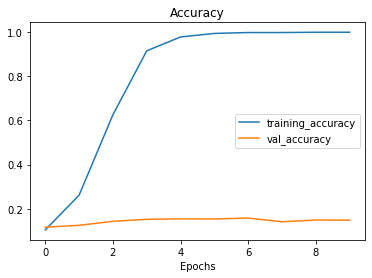

In [8]:
plot_loss_curves(historia)

In [9]:
import matplotlib.pyplot as plt
import random
class_names = ['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon', 'hamburguer', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi']
def plot_random_image(ds, model = model,batch_size = 32, class_name = random.sample(class_names, 1)):
  one = ds.take(1)
  for images, labels in one:
    rand_index = random.randint(0,batch_size-1)
    while(class_names[labels[rand_index].numpy().argmax()] != class_name):
          rand_index = random.randint(0,batch_size-1)
    plt.imshow(images[rand_index].numpy().astype("uint8"))
    title = class_names[labels[rand_index].numpy().argmax()]
    plt.xlabel(f'PREDICTION: {class_names[model.predict(tf.expand_dims(images[rand_index], axis=0)).argmax()]}')
    plt.title(title)
    # plt.axis(False)
    plt.show()

1/1 [==============================] - 0s 179ms/step


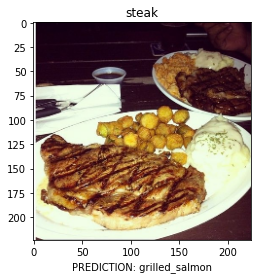

In [10]:
plot_random_image(test_data_10_percent, model,  32, 'steak')

#2.)Use feature-extraction to train a transfer learning model on 10% of the Food Vision data for 10 epochs using tf.keras.applications.EfficientNetB0 as the base model. Use the ModelCheckpoint callback to save the weights to file.

In [11]:
efficientnet_url = 'https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1'
import tensorflow_hub as hub

In [12]:
def create_model(model_url, num_classes=10):
  IMAGE_SHAPE = (224,224)
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False,
                                           name = 'feature_extractor_layer',
                                           input_shape = IMAGE_SHAPE+(3,))
  base_model = tf.keras.applications.EfficientNetB0(include_top=False)
  base_model.trainable = False
  model = tf.keras.Sequential([
      tf.keras.layers.Rescaling(scale = 1./255),
      feature_extractor_layer,
      tf.keras.layers.Dense(num_classes, activation = 'softmax', name = 'output1')
  ])
  return model, base_model

In [13]:
efficientnet_model1 = create_model(efficientnet_url, num_classes = 10)[0]
base_model = create_model(efficientnet_url,10)[1]

efficientnet_model1.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

In [14]:
import datetime
def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + '/' + experiment_name + '/'  + datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir = log_dir
  )
  print(f'Saving TensorBoard log files to {log_dir}')
  return tensorboard_callback

In [15]:
checkpoint_path = "ten_percent_model_checkpoints_weights/checkpoint.ckpt" # note: remember saving directly to Colab is temporary
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True, # set to False to save the entire model
                                                         save_best_only=False, # set to True to save only the best model instead of a model every epoch 
                                                         save_freq="epoch", # save every epoch
                                                         verbose=1)


In [16]:
initial_epochs = 10
history_10_percent_eff = efficientnet_model1.fit(train_data_10_percent,
                                epochs=initial_epochs,
                                validation_data=test_data_10_percent,
                                validation_steps=len(test_data_10_percent), # do less steps per validation (quicker)
                                callbacks=[create_tensorboard_callback("tensorflow_hub", "10_percent_efficientnet, 10epochs"), 
                                checkpoint_callback])


Saving TensorBoard log files to tensorflow_hub/10_percent_efficientnet, 10epochs/20221106-230442
Epoch 1/10
24/24 [==============================] - ETA: 0s - loss: 1.9091 - accuracy: 0.3893
Epoch 1: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 20s 415ms/step - loss: 1.9091 - accuracy: 0.3893 - val_loss: 1.3223 - val_accuracy: 0.7184
Epoch 2/10
23/24 [===========================>..] - ETA: 0s - loss: 1.0874 - accuracy: 0.7880
Epoch 2: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 10s 396ms/step - loss: 1.0833 - accuracy: 0.7867 - val_loss: 0.8767 - val_accuracy: 0.8128
Epoch 3/10
23/24 [===========================>..] - ETA: 0s - loss: 0.7648 - accuracy: 0.8424
Epoch 3: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 8s 341ms/step - loss: 0.7661 - accuracy: 0.8427 - val_loss: 0.7018 - val_accura

In [17]:
!tensorboard dev upload --logdir ./tensorflow_hub/ \
  --name "Efficient net feature extraction, MODEL:10 classes food 10% data" \
  --description "First 10 epochs of transfer learning with efficientnetb0" \
  --one_shot


New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/hGq9GdJTR8C9uzo1PhKbuw/

[2022-11-06T23:06:39] Started scanning logdir.
[2022-11-06T23:06:49] Total uploaded: 246 scalars, 0 tensors, 4 binary objects (15.5 MB)
[2022-11-06T23:06:49] Done scanning logdir.


Done. View your TensorBoard at https://tensorboard.dev/experiment/hGq9GdJTR8C9uzo1PhKbuw/


In [18]:
efficientnet_model1.load_weights(checkpoint_path)
loaded_weights_model_results = efficientnet_model1.evaluate(test_data_10_percent)

79/79 [==============================] - 6s 73ms/step - loss: 0.4421 - accuracy: 0.8732


# 3.)Fine-tune the last 20 layers of the base model you trained in 2 for another 10 epochs. How did it go?

In [19]:
base_model.trainable = True
for layer in base_model.layers[:-20]:
  layer.trainable = False

In [20]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_2 False
1 rescaling_2 False
2 normalization_1 False
3 tf.math.truediv_1 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeez

In [21]:
fine_tune_epochs = 20
history_finetunning_20 = efficientnet_model1.fit(train_data_10_percent,
                                               epochs=fine_tune_epochs,
                                               validation_data=test_data_10_percent,
                                               initial_epoch=history_10_percent_eff.epoch[-1], # start from previous last epoch
                                               validation_steps=len(test_data_10_percent),
                                               callbacks=[create_tensorboard_callback("tensorflow_hub", "10_percent_fine_tune_20capas_10percent")])

Saving TensorBoard log files to tensorflow_hub/10_percent_fine_tune_20capas_10percent/20221106-230701
Epoch 10/20
24/24 [==============================] - 9s 320ms/step - loss: 0.2597 - accuracy: 0.9627 - val_loss: 0.4323 - val_accuracy: 0.8728
Epoch 11/20
24/24 [==============================] - 8s 321ms/step - loss: 0.2375 - accuracy: 0.9707 - val_loss: 0.4231 - val_accuracy: 0.8740
Epoch 12/20
24/24 [==============================] - 8s 322ms/step - loss: 0.2180 - accuracy: 0.9760 - val_loss: 0.4153 - val_accuracy: 0.8780
Epoch 13/20
24/24 [==============================] - 8s 317ms/step - loss: 0.1998 - accuracy: 0.9787 - val_loss: 0.4076 - val_accuracy: 0.8792
Epoch 14/20
24/24 [==============================] - 8s 320ms/step - loss: 0.1843 - accuracy: 0.9827 - val_loss: 0.4034 - val_accuracy: 0.8804
Epoch 15/20
24/24 [==============================] - 8s 319ms/step - loss: 0.1706 - accuracy: 0.9853 - val_loss: 0.3992 - val_accuracy: 0.8804
Epoch 16/20
24/24 [=====================